# Methods

Decision trees are a non-parametric supervised learning method commonly used in data science for classification and regression. They are constructed through a sequential process of creating rules that conditionally branch based on features, leading to different outcomes. The goal is to predict the target variable by following the paths formed by these rules, with outcomes stored in the leaf nodes. Decision trees are made up of a hierarchical structure containing nodes, where each node corresponds to a decision or a test based on a specific feature. Starting with a root node, the tree branches into internal nodes representing conditions for splitting the data. At the end of each branch, leaves represent the final decisions, indicating predicted classes in classification tasks or predicted values in regression tasks. For regression, the target variable is continuous, while for classification, the target variable has distinct values, with leaves representing class labels and branches indicating combinations of features that determine those class labels.

For classification tasks, decision trees utilize a measurement called Gini Impurity to determine how nodes and features should be split. It signifies the probability of misclassifying new, randomly labeled data when assigned a random class label based on the dataset's class distribution. For regression tasks, decision trees utilize error metrics like Mean square error (MSE) to determine how nodes and features should be split. The MSE in decision trees represents the average squared difference between the predicted and actual values, serving as a measure of the model's accuracy in predicting continuous outcomes. Both types of decision trees can be hyper-parameter-tuned. One easy way to do this is based on the depth or number of layers of the decision tree and the corresponding performance metrics.

Decision trees are particularly useful because they are pretty intuitive and easy to follow and do an excellent job of showing the evaluation process of the model. However, they are sensitive to small changes within a dataset, and results can vary greatly based on small parameter changes. So, in addition to basic decision trees, I will also be utilizing random forests, which is a type of ensemble learning. Random forests utilize decision trees by building multiple trees from random feature subsets and then make a final prediction from a majority over the results. They offer improved accuracy and reduced overfitting compared to individual Decision Trees, especially on complex datasets. However, they are less interpretable, computationally intensive, and may not be suitable for small datasets. 

In this section, I will be using decision trees for both regression and classification on the NBA combine dataset. For classification, I will be using 'above_max_vert_mean' as the target variable, and for regression, I will be using maximum vertical jump as the target variable. I hope to uncover what features and what splits are utilized in order to predict both if a player has an above average maximum vertical jump and maximum vertical jump. While both these tasks have been completed already using other methods, it will be interesting to see how decision trees differ and if they will be able to better visualize relationships between features.  

# Classification

For Classification, I will be using 'above_max_vert_mean' as the target variable, as I mentioned before. I removed any features from X that were similar metrics or tests to maximum vertical jump as they would result in an uninteresting model. I first imported my data and looked at the class distribution, which all appear to be somewhat normal. I then fit and trained a basic decision tree model and displayed the confusion matrix for both the training and test data as well as the tree itself. I then added a random classifier and the resulting confusion matrix for comparison. I then hyper-parameter-tuned the model based on max depth based on accuracy, recall, and negative recall and plotted the results. I then found the optimal parameters based on the graph and ran the decision tree model again with those parameters. 

I also utilized a Random Forest model to see if it would generate more accurate results. I ran the model without changing any parameters and displayed the resulting confusion matrix. I then hyper-parameter-tuned max depth and number of estimators based on accuracy and plotted the results. I then ran the model again with the optimal parameters and displayed the resulting confusion matrix. I lastly displayed the feature importances for the random forest.


In [245]:
#| code-fold: true
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns



combine_df = pd.read_csv("../../data/01-modified-data/cleaned_NBA_combine.csv")
combine_df = combine_df[combine_df["combine_year"]>2009]
combine_df = combine_df.dropna()
max_vert_mean = combine_df["MAX.VERTICAL"].mean()
combine_df["above_max_vert_mean"] = (combine_df["MAX.VERTICAL"]> max_vert_mean).astype(int)


drop_cols = ["Unnamed: 0", "POS", "combine_year", "Name", "MAX.VERTICAL", "STANDING.VERTICAL", 'STANDING.TOUCH', 'MAX.TOUCH',]
feature_matrix = combine_df.drop(columns= drop_cols)
feature_cols = feature_matrix.columns.tolist()
X = feature_matrix.drop(columns=['above_max_vert_mean'])
Y = feature_matrix['above_max_vert_mean']

print(feature_matrix.describe())



           HEIGHT      WEIGHT         BMI    BODY.FAT  STANDING.REACH  \
count  227.000000  227.000000  227.000000  227.000000      227.000000   
mean    77.219163  211.290308   24.868546    6.577974      102.955947   
std      3.297414   23.335392    1.755754    2.107519        4.898781   
min     69.500000  164.800000   20.630000    2.900000       89.500000   
25%     75.125000  194.800000   23.625000    5.000000       99.500000   
50%     77.250000  208.400000   24.740000    6.100000      103.000000   
75%     79.500000  227.200000   26.105000    7.500000      106.500000   
max     89.250000  288.800000   29.820000   14.900000      122.500000   

         WINGSPAN  HAND.LENGTH  HAND.WIDTH  LANE.AGILITY  SHUTTLE.RUN  \
count  227.000000   227.000000  227.000000    227.000000   227.000000   
mean    82.258811     8.698238    9.407930     11.275286     3.122907   
std      3.958430     0.510203    0.674457      0.575139     0.184022   
min     70.750000     7.500000    7.000000      9.

In [246]:
#| code-fold: true
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def confusion_plot(y_data, y_pred):
    print('ACCURACY:', accuracy_score(y_data, y_pred))
    print('NEGATIVE RECALL (Y=0):', recall_score(y_data, y_pred, pos_label=0))
    print('NEGATIVE PRECISION (Y=0):', precision_score(y_data, y_pred, pos_label=0))
    print('POSITIVE RECALL (Y=1):', recall_score(y_data, y_pred, pos_label=1))
    print('POSITIVE PRECISION (Y=1):', precision_score(y_data, y_pred, pos_label=1))
    print(confusion_matrix(y_data, y_pred))

    sns.heatmap(confusion_matrix(y_data, y_pred), annot=True, fmt='d', cmap='coolwarm', cbar=True)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

### Basic Decision Tree

In [294]:
#| code-fold: true
from sklearn.model_selection import train_test_split
from sklearn import tree

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5000)

model = tree.DecisionTreeClassifier()
model = model.fit(x_train, y_train)

yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

------TRAINING------
ACCURACY: 1.0
NEGATIVE RECALL (Y=0): 1.0
NEGATIVE PRECISION (Y=0): 1.0
POSITIVE RECALL (Y=1): 1.0
POSITIVE PRECISION (Y=1): 1.0
[[87  0]
 [ 0 94]]


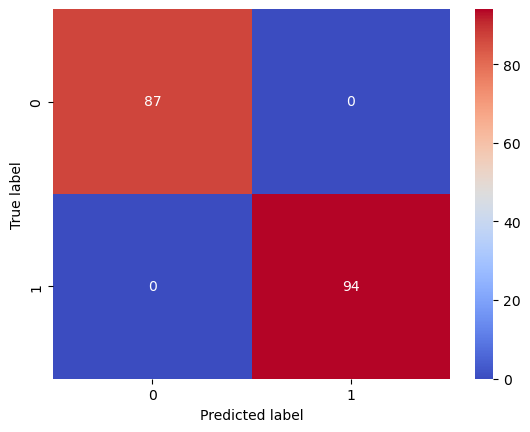

------TEST------
ACCURACY: 0.6739130434782609
NEGATIVE RECALL (Y=0): 0.8
NEGATIVE PRECISION (Y=0): 0.6666666666666666
POSITIVE RECALL (Y=1): 0.5238095238095238
POSITIVE PRECISION (Y=1): 0.6875
[[20  5]
 [10 11]]


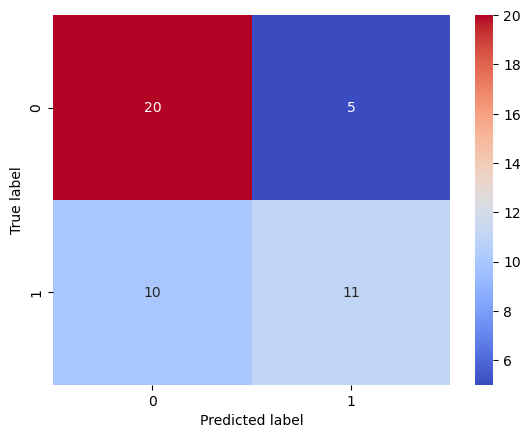

In [295]:
#| code-fold: true
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

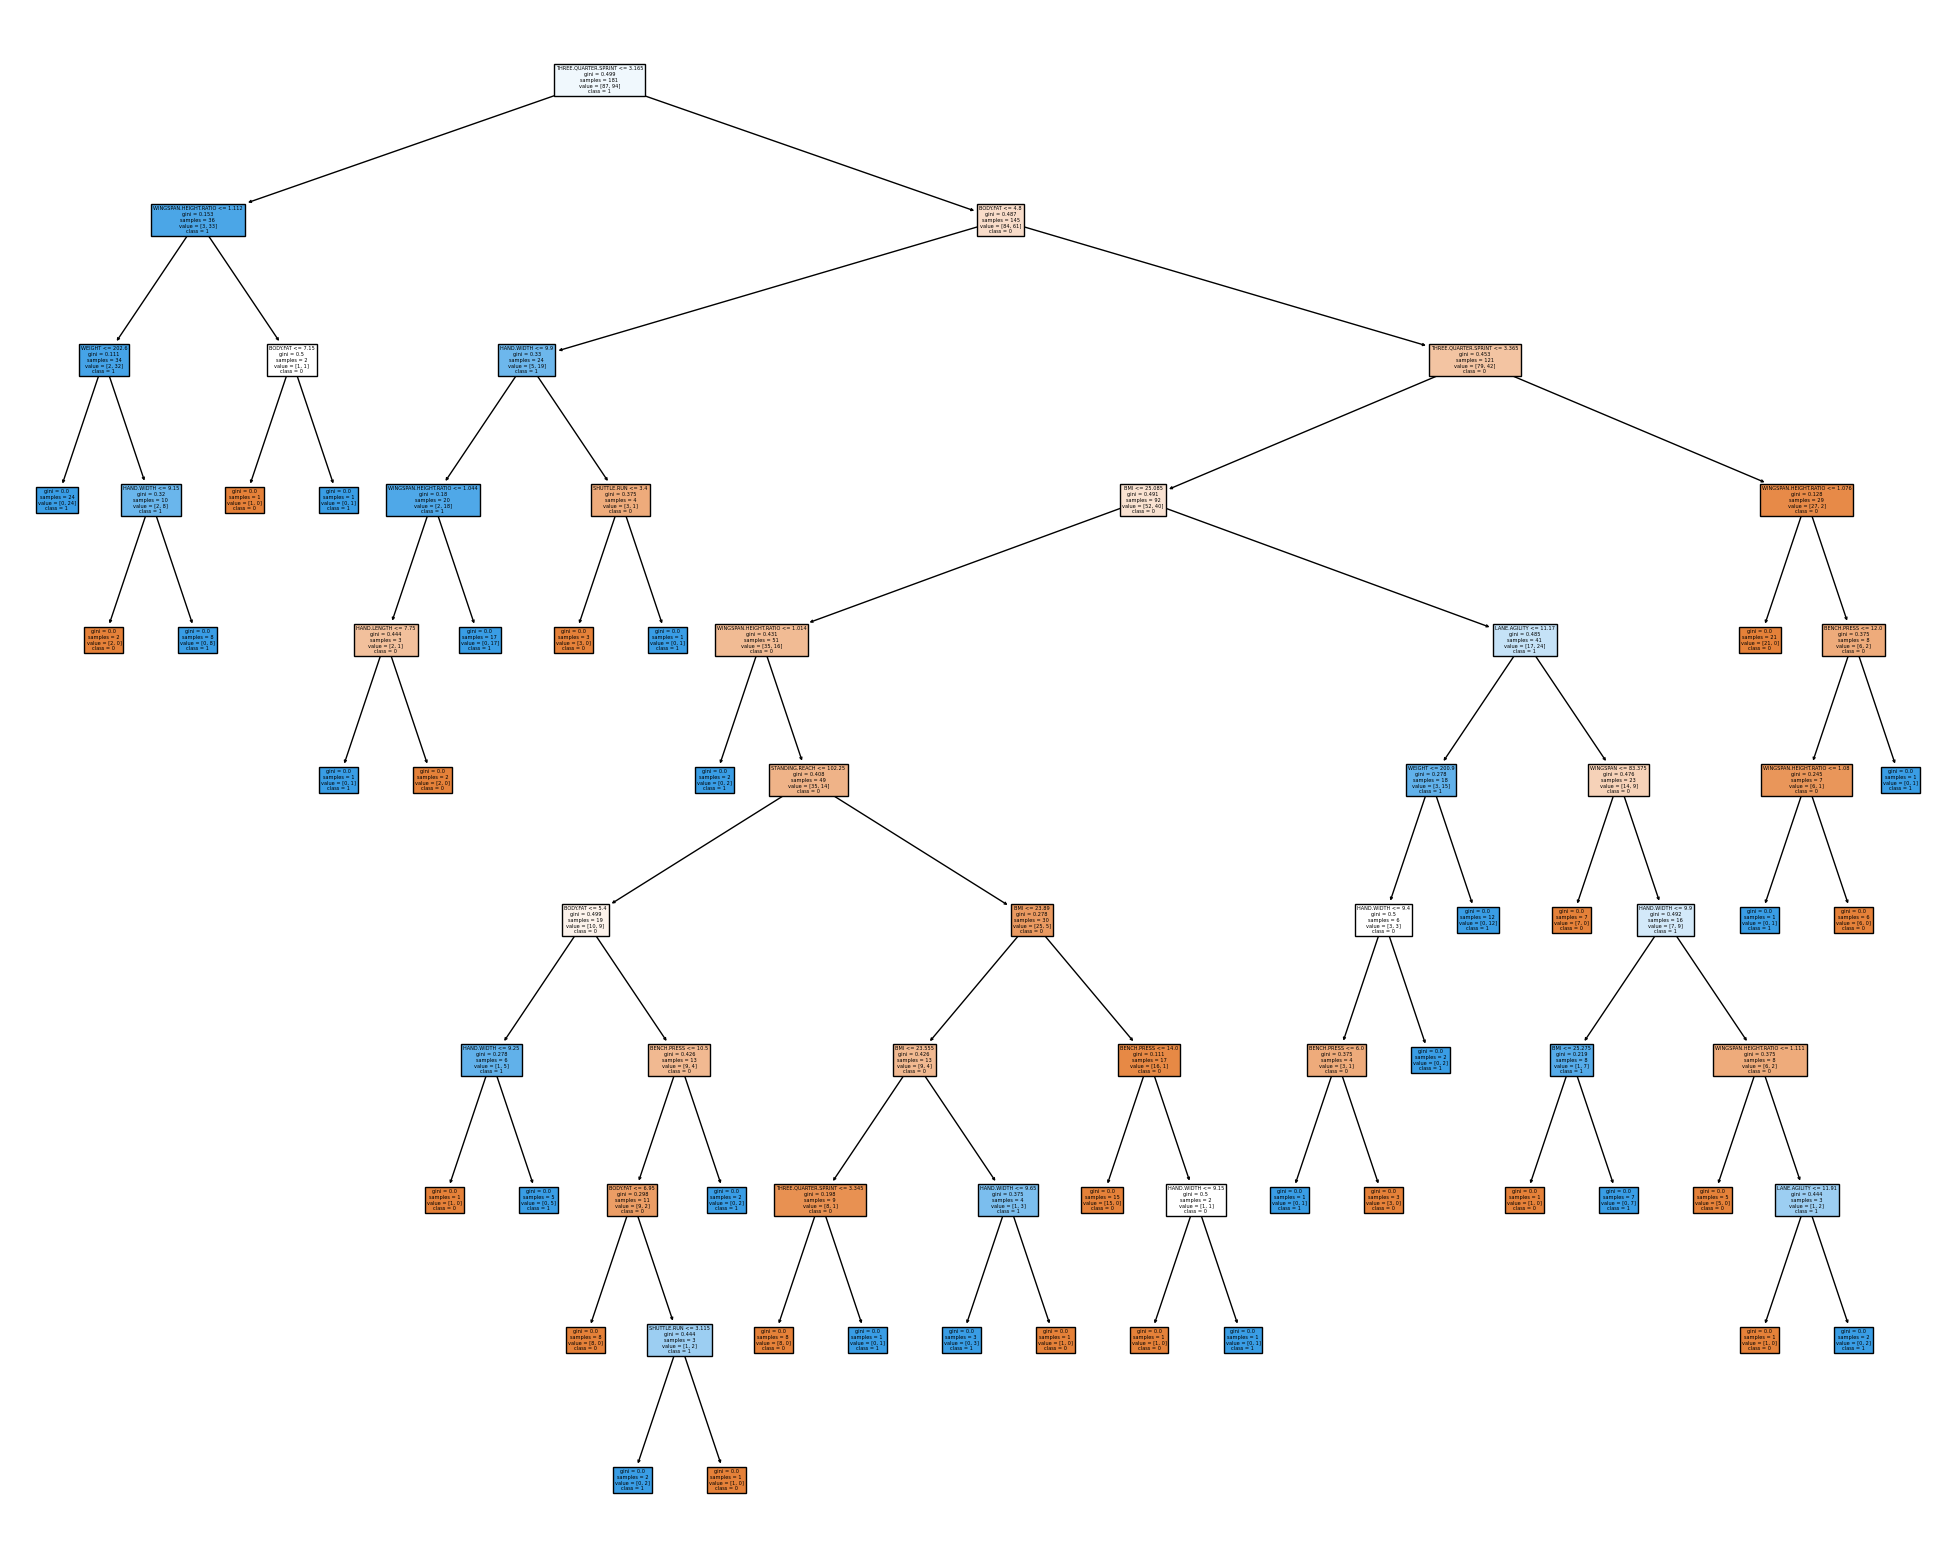

In [296]:
#| code-fold: true
def plot_tree(model, X, Y):
    feature_names = X.columns.tolist()
    class_names = list(map(str, set(Y)))
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(model,
                    feature_names=feature_names, 
                    class_names=class_names,
                    filled=True)
    plt.show()

plot_tree(model, X, Y)

### Random Classifier

ACCURACY: 0.5434782608695652
NEGATIVE RECALL (Y=0): 0.6
NEGATIVE PRECISION (Y=0): 0.5769230769230769
POSITIVE RECALL (Y=1): 0.47619047619047616
POSITIVE PRECISION (Y=1): 0.5
[[15 10]
 [11 10]]


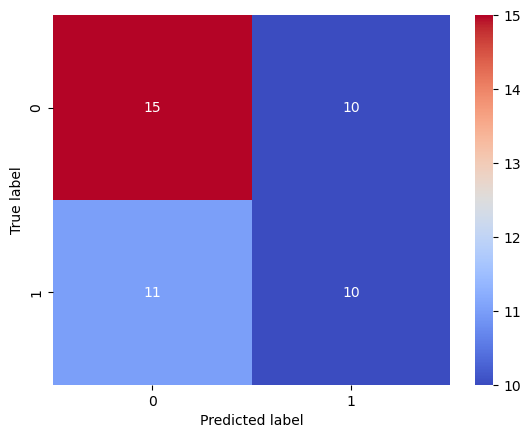

In [224]:
#| code-fold: true
def random_classifier(y_data):
    ypred=[];
    max_label=np.max(y_data); 
    for i in range(0,len(y_data)):
        ypred.append(int(np.floor((max_label+1)*np.random.uniform(0,1))))
    return ypred

yp_test_random = random_classifier(y_test)
confusion_plot(y_test, yp_test_random)

### Hyper-parameter tuning Decision Tree

In [276]:
#| code-fold: true
test_results=[]
train_results=[]

for num_layer in range(1,20):
    model = tree.DecisionTreeClassifier(max_depth=num_layer)
    model = model.fit(x_train, y_train)

    yp_train=model.predict(x_train)
    yp_test=model.predict(x_test)

    test_results.append([num_layer,accuracy_score(y_test, yp_test),recall_score(y_test, yp_test,pos_label=0),recall_score(y_test, yp_test,pos_label=1)])
    train_results.append([num_layer, accuracy_score(y_train, yp_train), recall_score(y_train, yp_train, pos_label=0),recall_score(y_train, yp_train, pos_label=1)])



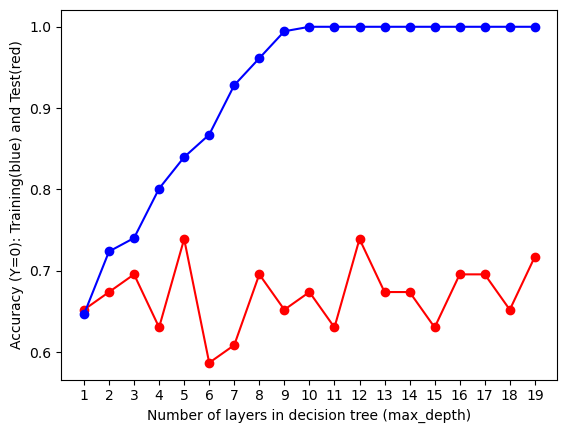

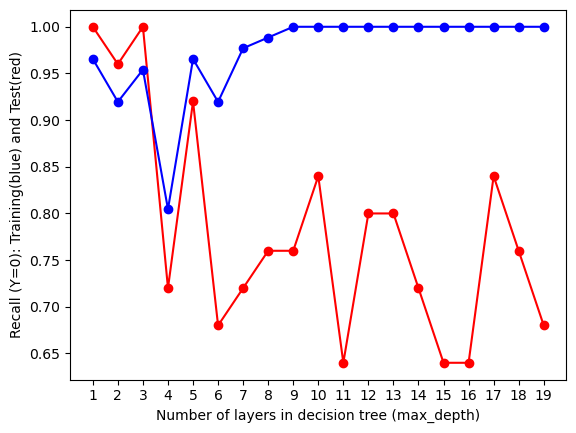

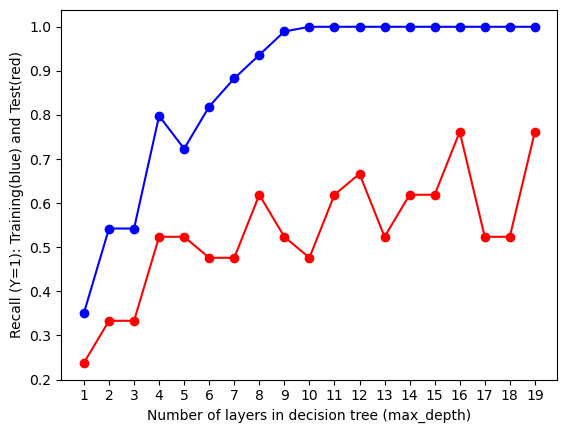

In [277]:
#| code-fold: true
plt.figure()
plt.plot([result[0] for result in test_results], [result[1] for result in test_results], color='red', marker='o')
plt.plot([result[0] for result in train_results], [result[1] for result in train_results], color='blue', marker='o')
plt.xlabel('Number of layers in decision tree (max_depth)')
plt.ylabel('Accuracy (Y=0): Training(blue) and Test(red)')
plt.xticks(np.arange(min(num_layers), max(num_layers) + 1, 1.0))
plt.show()

plt.figure()
plt.plot([result[0] for result in test_results], [result[2] for result in test_results], color='red', marker='o')
plt.plot([result[0] for result in train_results], [result[2] for result in train_results], color='blue', marker='o')
plt.xlabel('Number of layers in decision tree (max_depth)')
plt.ylabel('Recall (Y=0): Training(blue) and Test(red)')
plt.xticks(np.arange(min(num_layers), max(num_layers) + 1, 1.0))
plt.show()

plt.figure()
plt.plot([result[0] for result in test_results], [result[3] for result in test_results], color='red', marker='o')
plt.plot([result[0] for result in train_results], [result[3] for result in train_results], color='blue', marker='o')
plt.xlabel('Number of layers in decision tree (max_depth)')
plt.ylabel('Recall (Y=1): Training(blue) and Test(red)')
plt.xticks(np.arange(min(num_layers), max(num_layers) + 1, 1.0))
plt.show()

### Optimal Decision Tree

In [292]:
#| code-fold: true

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5000)

model = tree.DecisionTreeClassifier(max_depth=5)
model = model.fit(x_train, y_train)

yp_train = model.predict(x_train)
yp_test = model.predict(x_test)



------TRAINING------
ACCURACY: 0.850828729281768
NEGATIVE RECALL (Y=0): 0.9655172413793104
NEGATIVE PRECISION (Y=0): 0.7777777777777778
POSITIVE RECALL (Y=1): 0.7446808510638298
POSITIVE PRECISION (Y=1): 0.958904109589041
[[84  3]
 [24 70]]


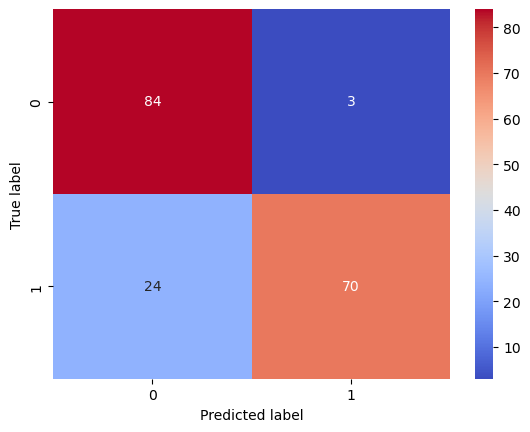

------TEST------
ACCURACY: 0.7391304347826086
NEGATIVE RECALL (Y=0): 0.84
NEGATIVE PRECISION (Y=0): 0.7241379310344828
POSITIVE RECALL (Y=1): 0.6190476190476191
POSITIVE PRECISION (Y=1): 0.7647058823529411
[[21  4]
 [ 8 13]]


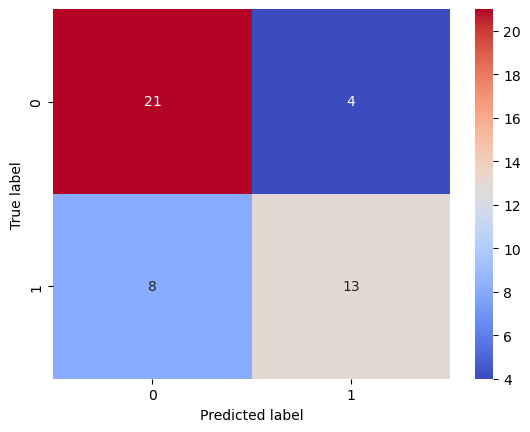

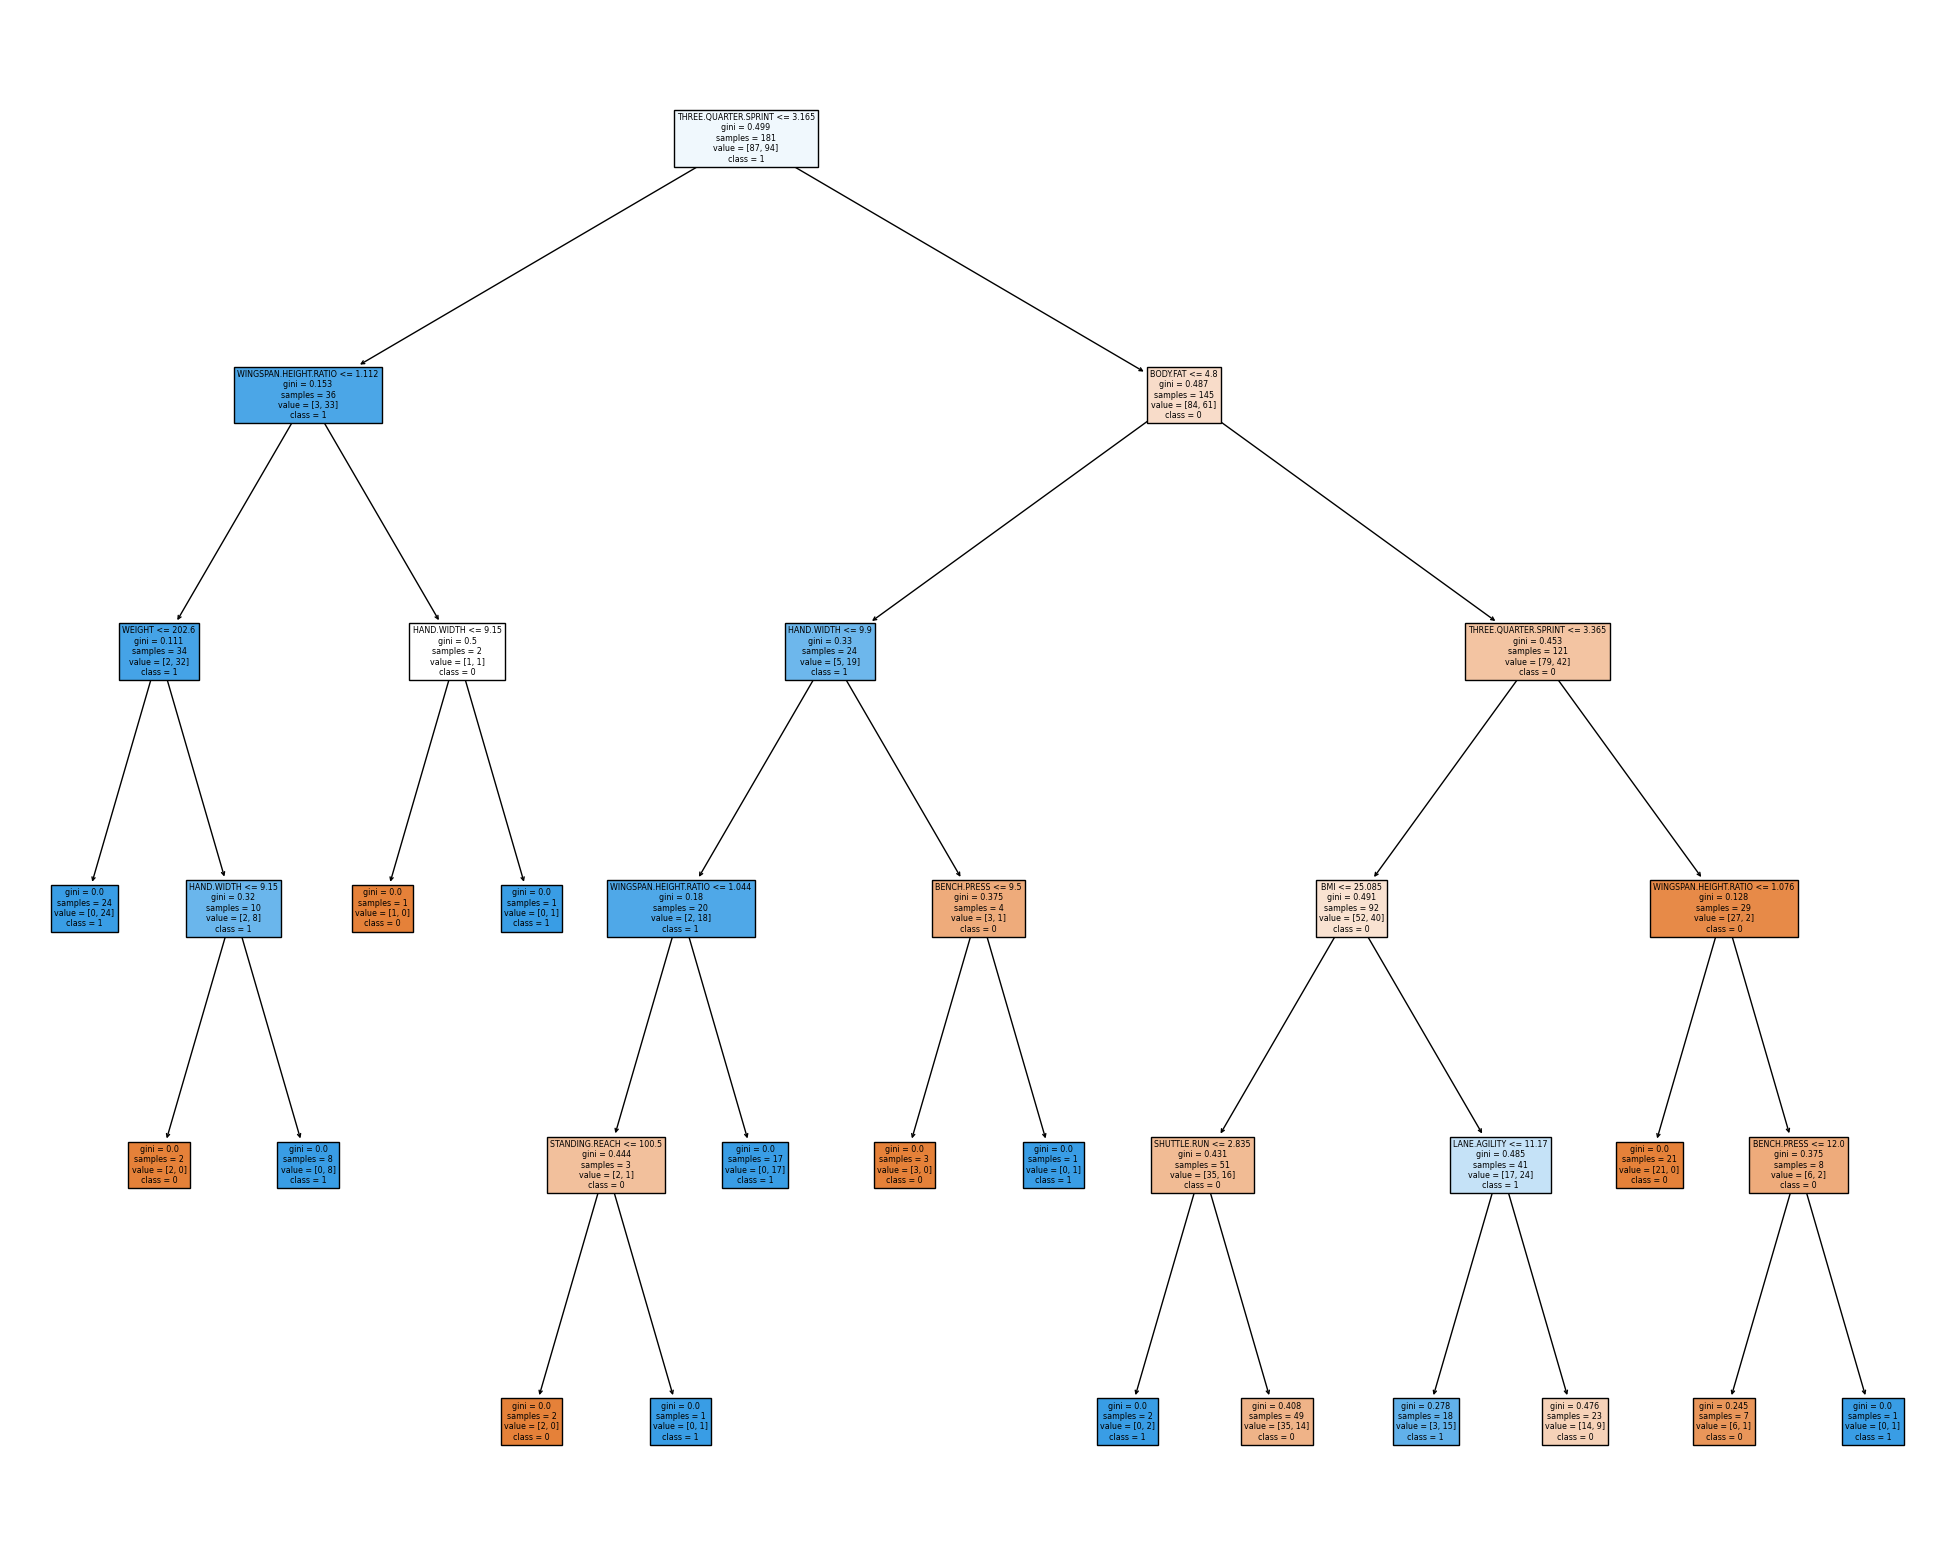

In [293]:
#| code-fold: true
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

plot_tree(model,X,Y)

### Random Forest Classifier

In [229]:
#| code-fold: true
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5000)

rf_model = RandomForestClassifier(random_state=5000)
rf_model.fit(x_train, y_train)

yp_train = rf_model.predict(x_train)
yp_test = rf_model.predict(x_test)



------TRAINING------
ACCURACY: 1.0
NEGATIVE RECALL (Y=0): 1.0
NEGATIVE PRECISION (Y=0): 1.0
POSITIVE RECALL (Y=1): 1.0
POSITIVE PRECISION (Y=1): 1.0
[[87  0]
 [ 0 94]]


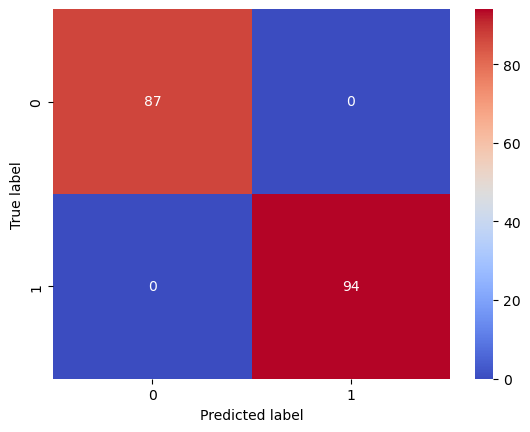

------TEST------
ACCURACY: 0.8043478260869565
NEGATIVE RECALL (Y=0): 0.68
NEGATIVE PRECISION (Y=0): 0.9444444444444444
POSITIVE RECALL (Y=1): 0.9523809523809523
POSITIVE PRECISION (Y=1): 0.7142857142857143
[[17  8]
 [ 1 20]]


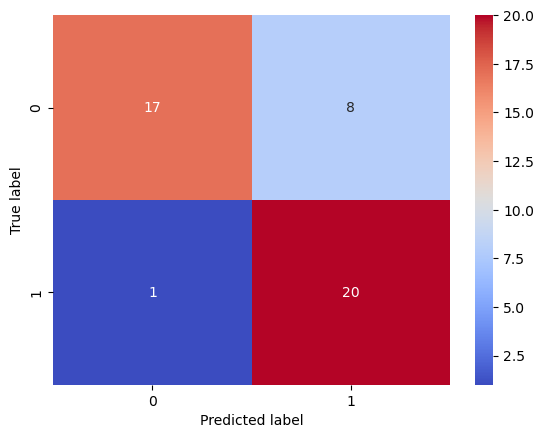

In [230]:
#| code-fold: true
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test, yp_test)

### Random Forest Hyper-parameter tuning

In [232]:
#| code-fold: true
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score

n_estimators_range = np.arange(20, 200, 20)
max_depth_range = [2,3,4,5,6,7]

test_results_df = pd.DataFrame(columns=['n_estimators', 'max_depth', 'accuracy', 'recall'])
train_results_df = pd.DataFrame(columns=['n_estimators', 'max_depth', 'accuracy', 'recall'])


for n_estimators in n_estimators_range:
    for max_depth in max_depth_range:
        
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=5000)
        model.fit(x_train, y_train)

        yp_train = model.predict(x_train)
        yp_test = model.predict(x_test)

        accuracy_train = accuracy_score(y_train, yp_train)
        accuracy_test = accuracy_score(y_test, yp_test)

        test_results_df = pd.concat([test_results_df, pd.DataFrame({'n_estimators': n_estimators, 'max_depth': max_depth, 'accuracy': accuracy_test}, index=[0])], ignore_index=True)
        train_results_df = pd.concat([train_results_df, pd.DataFrame({'n_estimators': n_estimators, 'max_depth': max_depth, 'accuracy': accuracy_train}, index=[0])], ignore_index=True)


test_results_df['set'] = 'test'
train_results_df['set'] = 'train'
result_df = pd.concat([test_results_df, train_results_df], ignore_index=True)



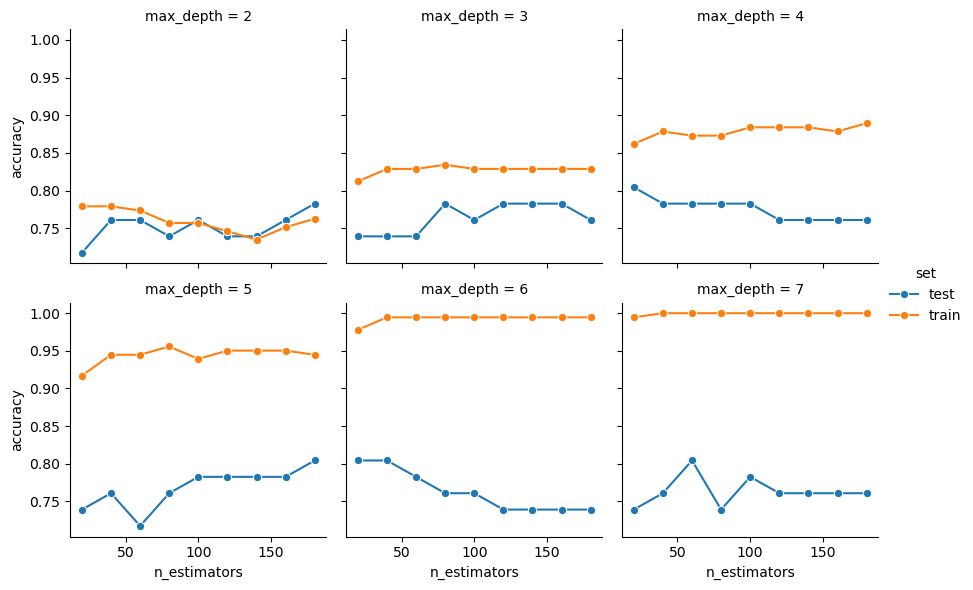

In [233]:
#| code-fold: true
import seaborn as sns
import matplotlib.pyplot as plt

def plot_hyperparam_grid(result_df):
    g = sns.FacetGrid(result_df, col="max_depth", hue="set", col_wrap=3)
    g.map_dataframe(sns.lineplot, x="n_estimators", y="accuracy", marker='o')
    g.add_legend()
    plt.show()

plot_hyperparam_grid(result_df)


### Optimal Random Forest

------TRAINING------
ACCURACY: 1.0
NEGATIVE RECALL (Y=0): 1.0
NEGATIVE PRECISION (Y=0): 1.0
POSITIVE RECALL (Y=1): 1.0
POSITIVE PRECISION (Y=1): 1.0
[[87  0]
 [ 0 94]]


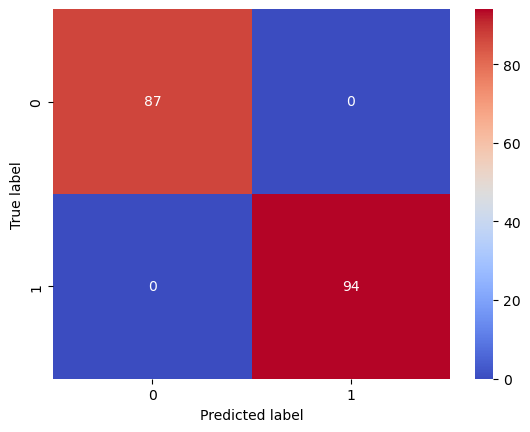

------TEST------
ACCURACY: 0.8043478260869565
NEGATIVE RECALL (Y=0): 0.72
NEGATIVE PRECISION (Y=0): 0.9
POSITIVE RECALL (Y=1): 0.9047619047619048
POSITIVE PRECISION (Y=1): 0.7307692307692307
[[18  7]
 [ 2 19]]


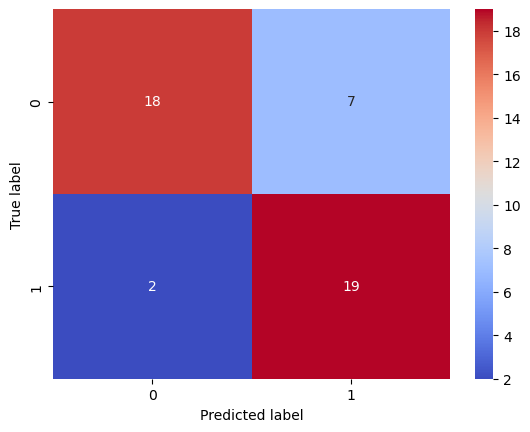

In [297]:
#| code-fold: true
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5000)

rf_model = RandomForestClassifier(n_estimators=60, max_depth=7,random_state=5000)
rf_model.fit(x_train, y_train)

yp_train = rf_model.predict(x_train)
yp_test = rf_model.predict(x_test)

print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test, yp_test)

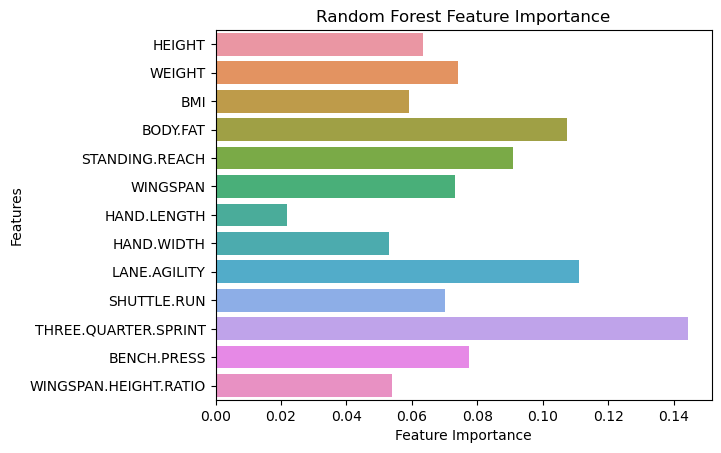

In [299]:
#| code-fold: true

feature_importances = rf_model.feature_importances_
feature_names = X.columns

sns.barplot(x=feature_importances, y=feature_names)
plt.title("Random Forest Feature Importance")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()


### Results

The first decision tree had an accuracy of 0.67, which was higher than the random classifier accuracy of 0.54. The hyper-parameter tuning showed the optimal number of layers for the decision tree was 5, and the resulting decision tree model had a test accuracy of 0.739. The random forest model had a test accuracy of 0.80. The hyper parameter tuning showed the optimal parameters were a max depth of 7 and an n_estimators of 60. The resulting model also had a test accuracy of 0.80. The most important features for the random forest were Three-Quarter Sprint, Lane Agility, and Body Fat.

These results and the decision trees themselves reveal a few interesting things. The decision model was not the most accurate. However, the hyper-parameter did help increase the accuracy a bit. The random forest was a lot more accurate, but the tuning did not change the accuracy at all. It actually only resulted in 1 label change. It was also interesting to look at the nodes on the decision trees, as many were based on variables that I would expect to have a relation to maximum vertical jump, like body fat, three-quarter sprint time, and other drills, but there were also some features used for splits that I would not expect to have a relation like hand width and height to wingspan ratio. Three-quarter sprint speed seemed to be the most important feature as it was used throughout both the trees and was the root node for both. It was also the most important feature for the random forest. Overall, there were not any groundbreaking takeaways from the classification models, but the decision tree visualizations and the splits were certainly interesting to analyze and follow.


# Regression

For regression, I will be using maximum vertical jump as the target variable. I once again removed any features from X that were similar metrics or tests to maximum vertical jump. I will then repeat the process of fitting and training the model and displaying the resulting tree as well as the MSE. I then tuned the model for max depth based on MSE and graphed the results. After selecting the optimal parameters based on the graph, and ran the model again with those parameters and displayed the resulting tree and MSE. 



### Basic Regression Tree

In [306]:
#| code-fold: true
drop_cols = ["Unnamed: 0", "POS", "combine_year", "Name", 'above_max_vert_mean', "STANDING.VERTICAL", 'STANDING.TOUCH', 'MAX.TOUCH',]
feature_matrix = combine_df.drop(columns= drop_cols)
feature_cols = feature_matrix.columns.tolist()
X = feature_matrix.drop(columns=["MAX.VERTICAL"])
Y = feature_matrix["MAX.VERTICAL"]

Mean Squared Error (Training): 0.0
Mean Squared Error (Testing): 18.11413043478261


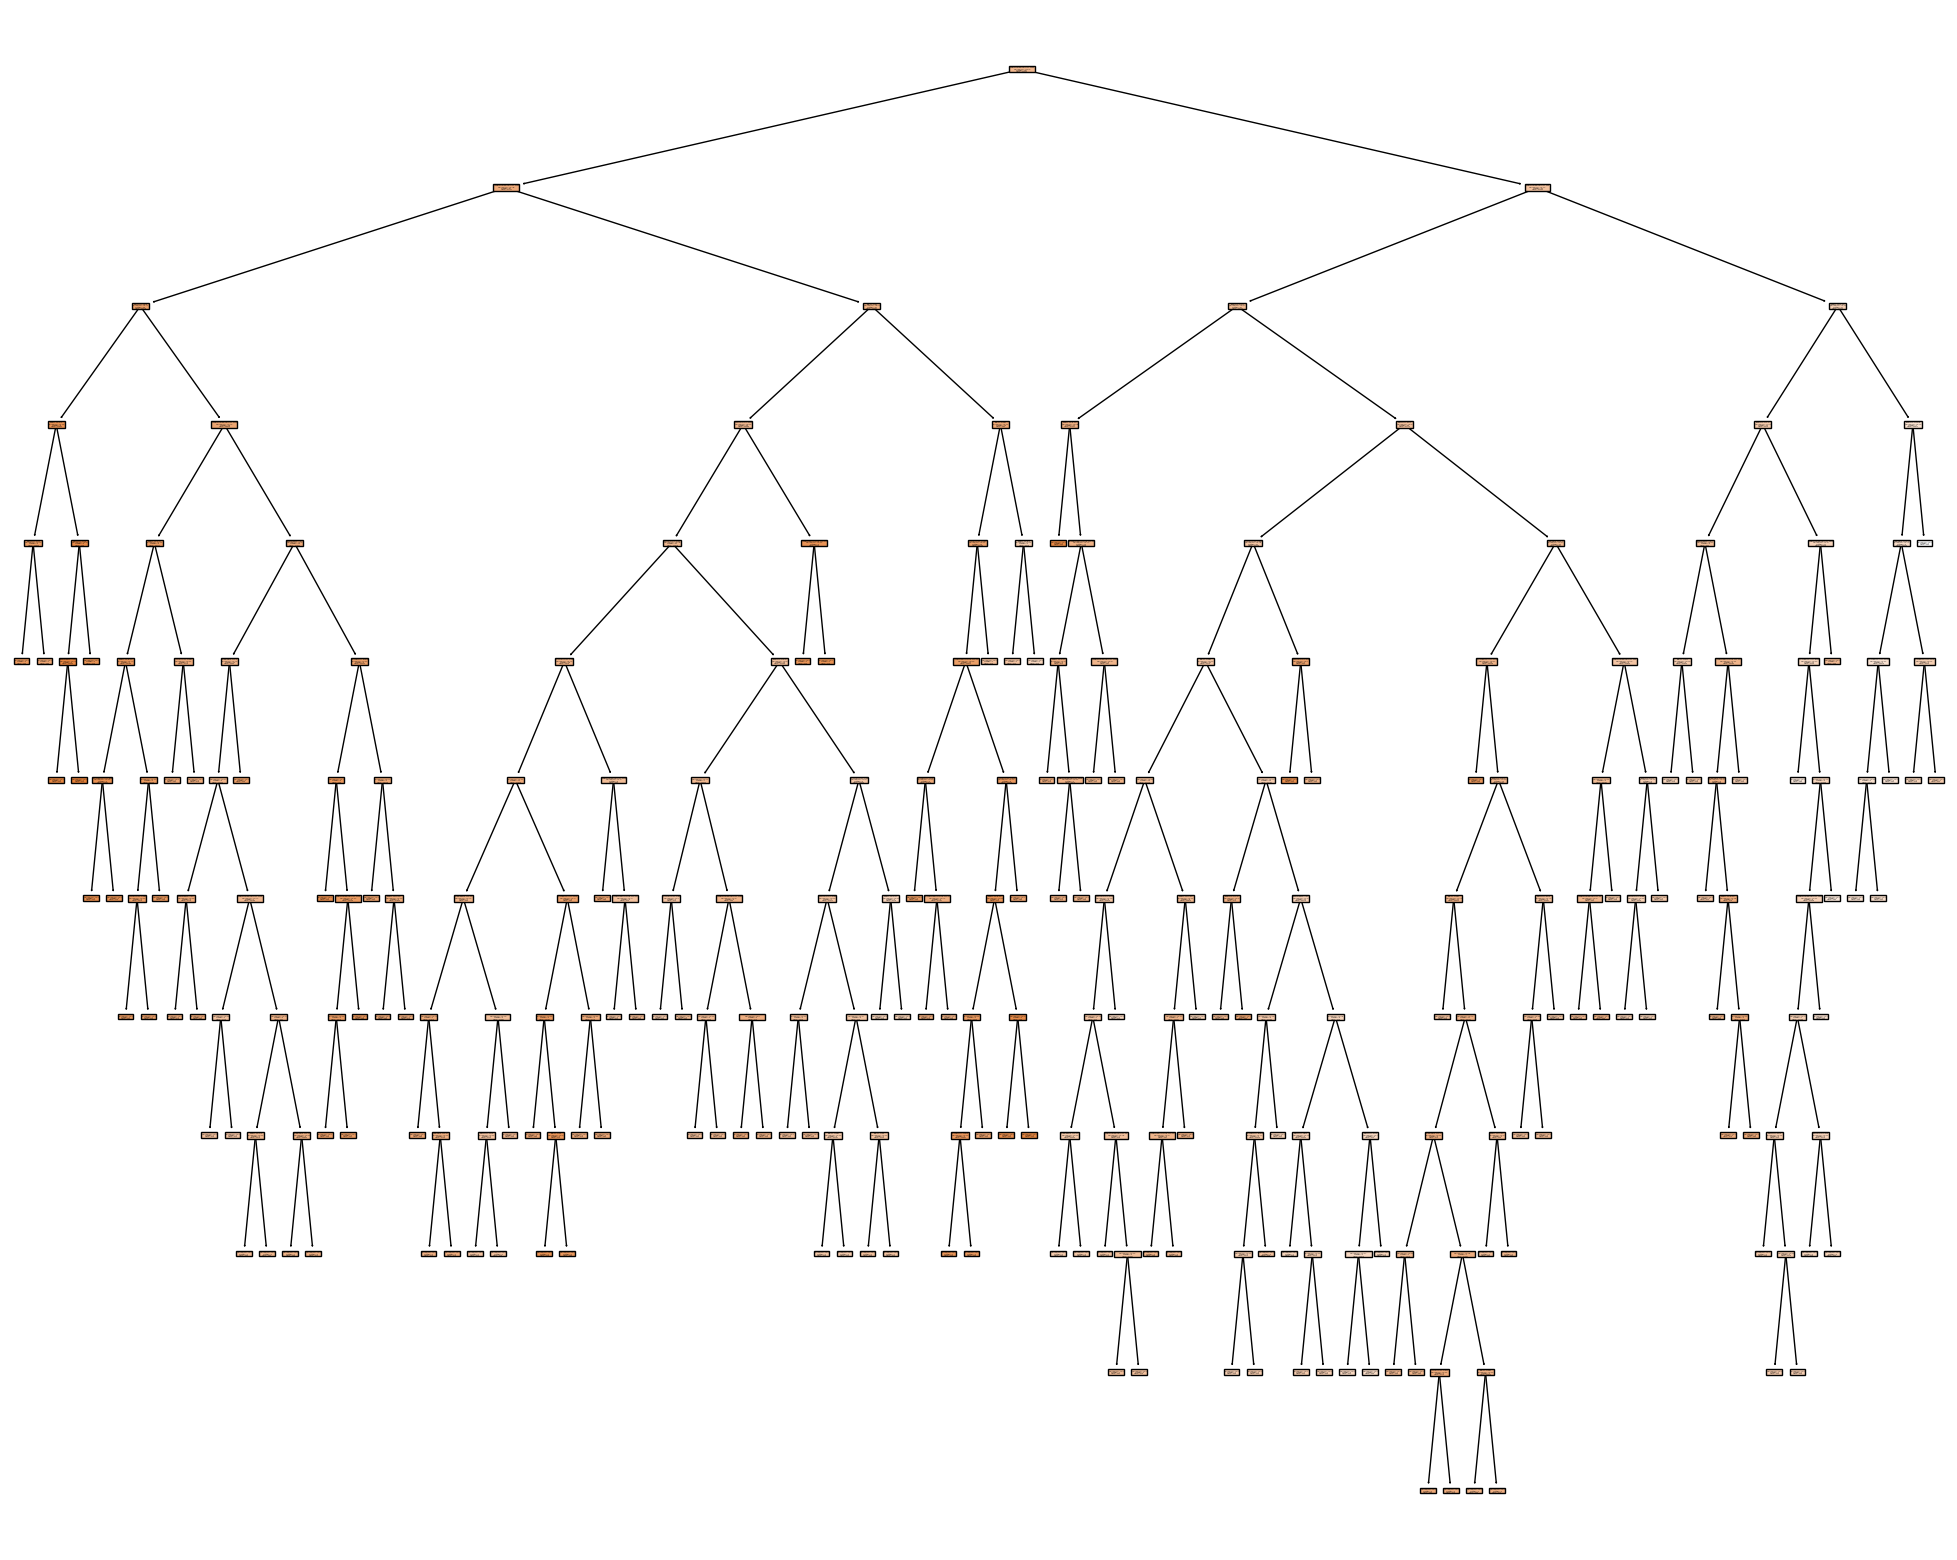

In [243]:
#| code-fold: true
from sklearn.tree import DecisionTreeRegressor

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5000)

model = tree.DecisionTreeRegressor()
model = model.fit(x_train, y_train)

yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

mse_train = mean_squared_error(y_train, yp_train)
mse_test = mean_squared_error(y_test, yp_test)

print("Mean Squared Error (Training):", mse_train)
print("Mean Squared Error (Testing):", mse_test)

plot_tree(model, X, Y)


### Hyper-paramter Tuning Decison Tree

In [237]:
#| code-fold: true
from sklearn.metrics import mean_squared_error
test_results = []
train_results = []

for num_layer in range(1, 20):
    model = DecisionTreeRegressor(max_depth=num_layer)
    model.fit(x_train, y_train)

    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)

    test_results.append([num_layer, mean_squared_error(y_test, yp_test)])
    train_results.append([num_layer, mean_squared_error(y_train, yp_train)])


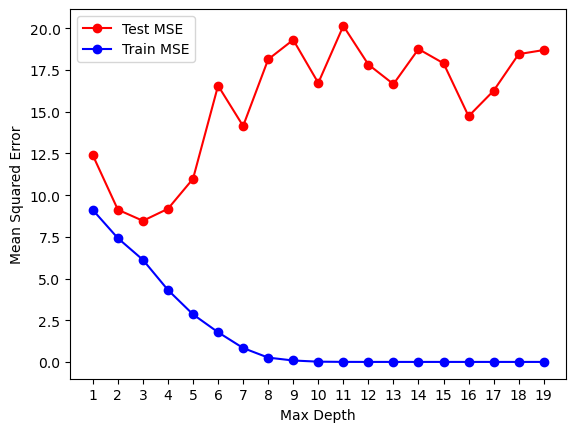

In [238]:
#| code-fold: true
num_layers = [result[0] for result in test_results]
mse_test = [result[1] for result in test_results]
mse_train = [result[1] for result in train_results]


plt.figure()
plt.plot(num_layers, mse_test, label='Test MSE',color='red', marker='o')
plt.plot(num_layers, mse_train, label='Train MSE',color='blue', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.xticks(np.arange(min(num_layers), max(num_layers) + 1, 1.0))
plt.show()



### Plotting optimal Regression Tree

Mean Squared Error (Training): 6.121817573923929
Mean Squared Error (Testing): 8.46191841110962


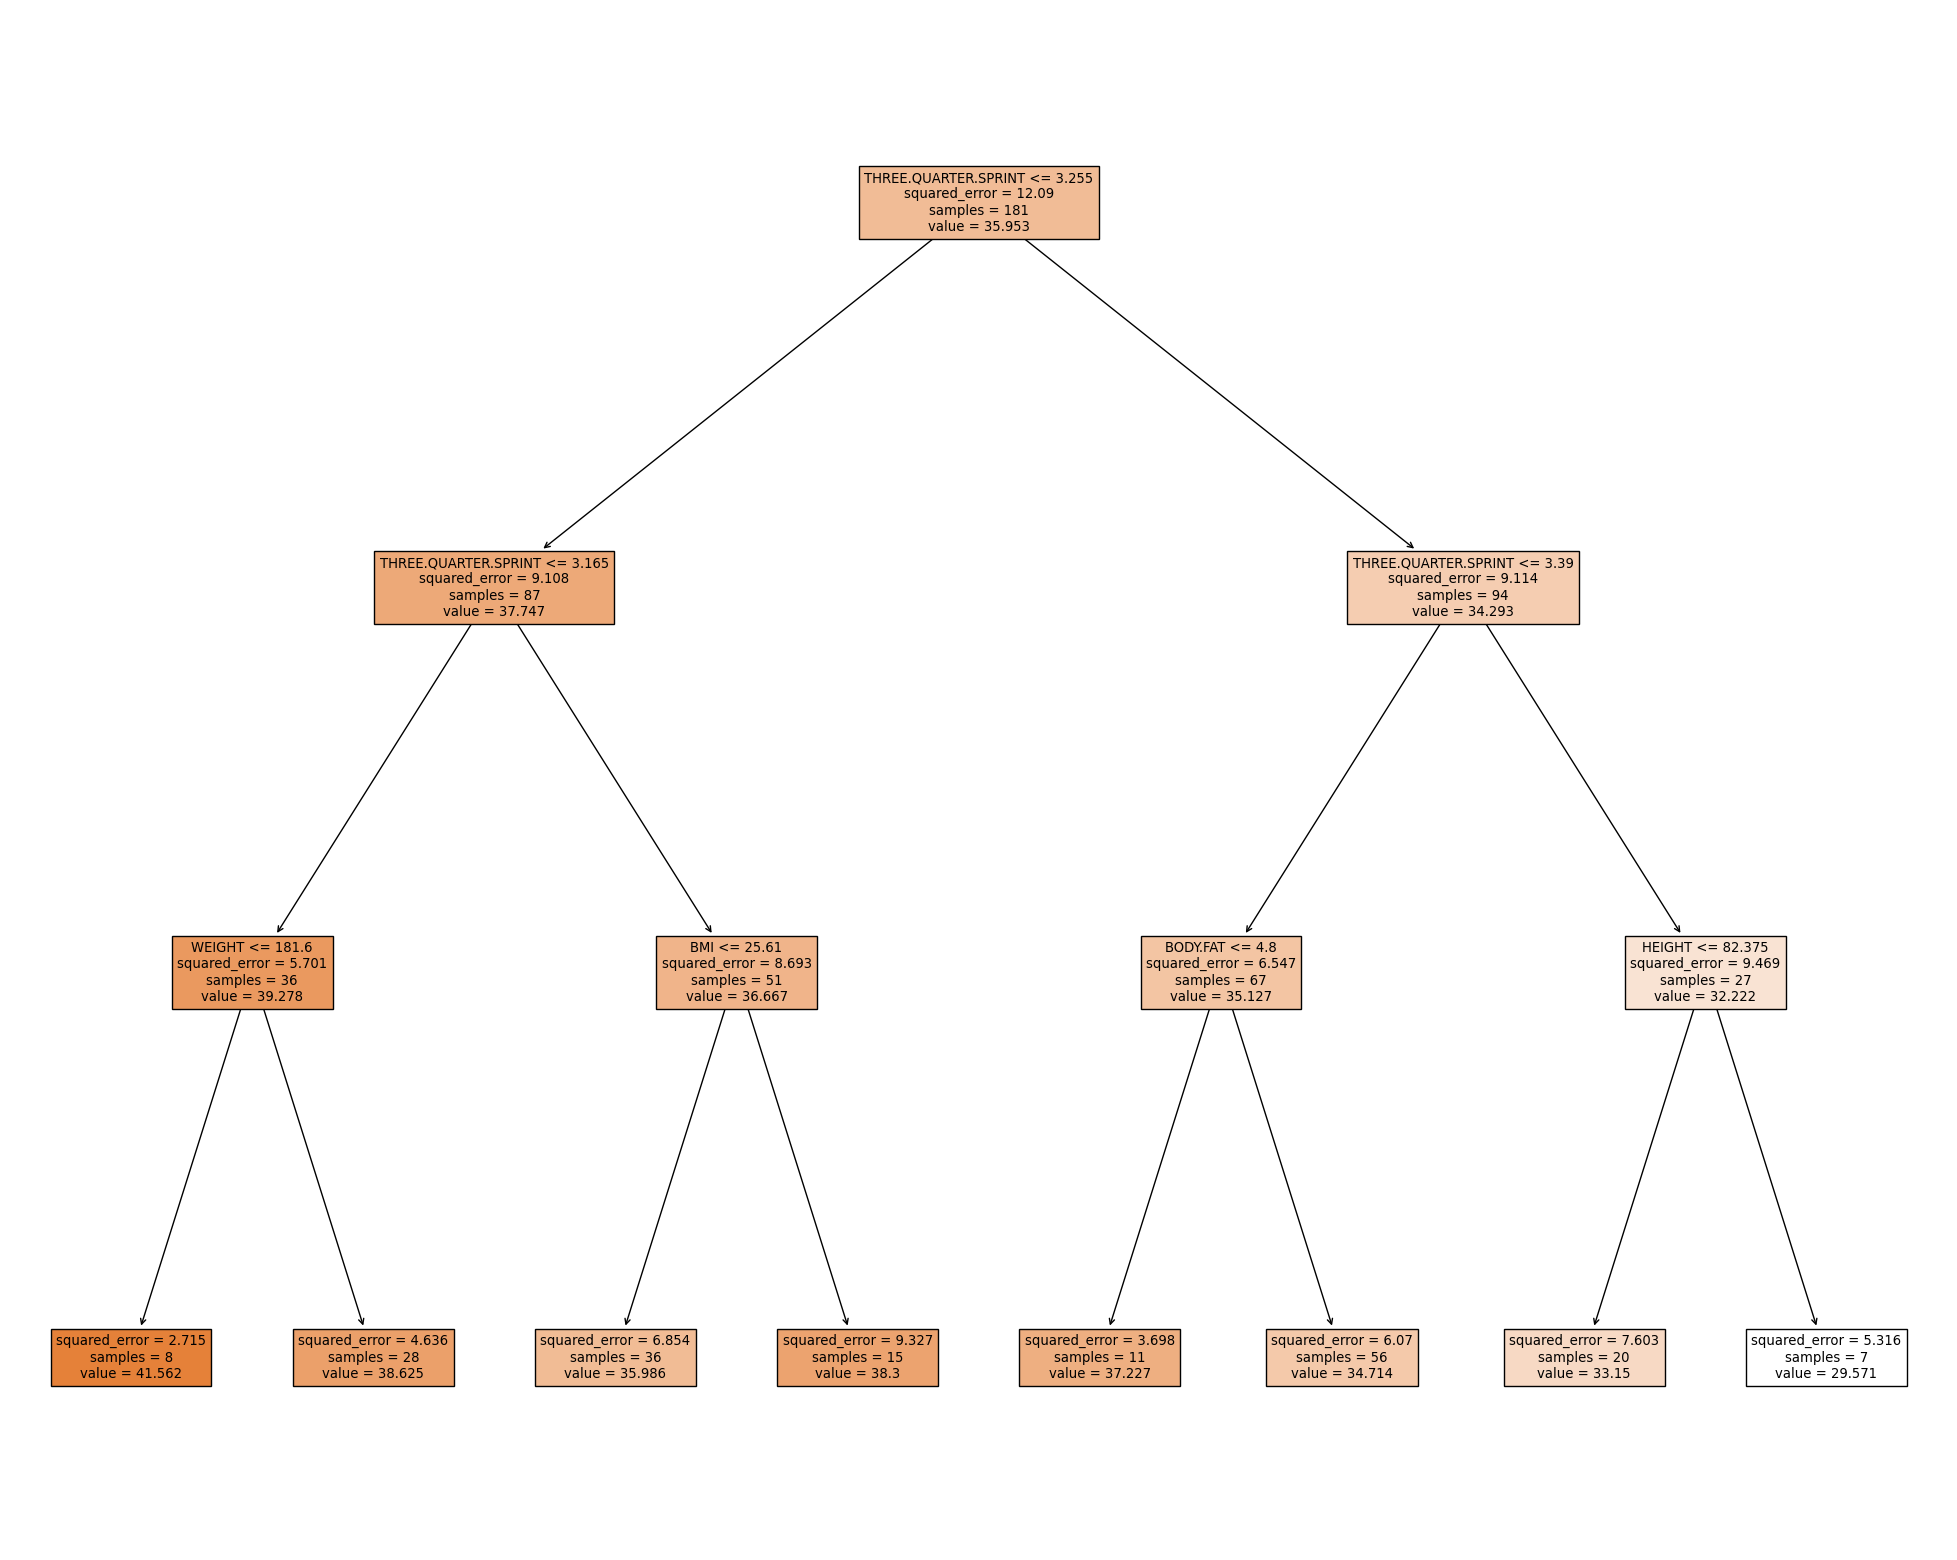

In [308]:
#| code-fold: true
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5000)

model = tree.DecisionTreeRegressor(max_depth = 3)
model = model.fit(x_train, y_train)

yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

mse_train = mean_squared_error(y_train, yp_train)
mse_test = mean_squared_error(y_test, yp_test)

print("Mean Squared Error (Training):", mse_train)
print("Mean Squared Error (Testing):", mse_test)

plot_tree(model, X, Y)

### Results

The first decision tree had a test MSE of 18.1 and had a large depth of 13 layers. The hyper parameter tuning showed the optimal number of layers for the decision tree was 3, and the resulting decision tree model had a test MSE of 8.4. The first tree was massive with a very large depth which made it difficult to read and understand. However, the second tree was much simpler and resulted in a much lower MSE. The nodes and splits on this regression tree were much more intuitive and what I would expect. It is interesting to note that three-quarter sprint speed was not only once again the root node but was also the child node of both branches from the root split. The nodes and splits from those splits were weight, BMI, body fat, and height. 

# Conclusions

In this exploration of decision trees for classification and regression on the NBA combine dataset, 'above_max_vert_mean' served as the classification target, while maximum vertical jump was the target for regression. The decision tree for classification outperformed a random classifier, and hyper-parameter tuning improved accuracy, revealing insights into important features like three-quarter sprint speed. In regression, initial complexity reduced with tuning, producing a more intuitive tree that highlighted the significance of features such as three-quarter sprint speed, weight, BMI, body fat, and height. It was interesting that the classification decision tree utilized very specific and seemingly unrelated measurements like hand width to make splits, which is a feature that has not popped up at all during this project and in the results of other models. I imagine this relation is likely more of a coincidence than anything of substance. 

Overall, the decision tree visualizations and splits provided interesting insights despite not yielding groundbreaking conclusions. The decision trees were not the most accurate model used in this project but were very valuable at providing insight into how the model was working and using each feature to make predictions. Using a random forest as opposed to a decision tree did help improve accuracy but did not have the same visualization capabilities as the decision trees. The biggest takeaway from the decision tree and random forest models is the significance of three-quarter sprint time in predicting maximum vertical jump height, which has been a common theme across different data science models and methods used in this project. 
